In [228]:
import pdb
import pandas
import numpy
import scipy
import datetime
import matplotlib.pyplot
import seaborn

In [229]:
# debugger = pdb.Pdb()
plt = matplotlib.pyplot

seaborn.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

%matplotlib inline

In [304]:
class Chart():

    @staticmethod
    def title(_settings):
        title = "{0}".format(_settings["title"])
        _settings["ax"].set_title(_settings["title"], size = 16)

    @staticmethod
    def legend(_settings):
        _settings["ax"].legend(loc = 'upper left', fontsize = 16)

    @staticmethod
    def xLabel(_settings):
        _settings["ax"].set_xlabel(_settings["xLabel"], size = 16)

    @staticmethod
    def yLabel(_settings):
        _settings["ax"].set_ylabel(_settings["yLabel"], size = 16)

    @staticmethod
    def xTicks(_settings):
        ax = _settings["ax"]
        index = _settings["frame"].index.values
        ticks = _settings["ax"].get_xticks()[:-1]

        time = index

        labels = [time[int(i)] for i in ticks]
        labels.append(labels[-1] + (labels[-1] - labels[-2]))
        labels = [str(l) for l in labels]
        ax.set_xticklabels(labels, size = 12, rotation = 90)

    @staticmethod
    def yTicks(_settings):
        ax = _settings["ax"]
        if "yTick_format" in _settings and _settings["yTick_format"] == float:
            labels = [str(round(l, 2)) for l in ax.get_yticks()]
        else:
            labels = [str(int(l)) for l in ax.get_yticks()]
        ax.set_yticklabels(labels, size = 12)

    @staticmethod
    def setup(_settings):

        Chart.title(_settings)
        Chart.legend(_settings)
        Chart.xLabel(_settings)
        Chart.xTicks(_settings)
        Chart.yLabel(_settings)
        Chart.yTicks(_settings)


In [305]:
filename = "US GDP Growth"

root = "/Users/pooch/code/data/"
data_path = "{0}/{1}.csv".format(root, filename)

decimalize = lambda _x: float(_x) / 100 + 1
gdp = pandas.read_csv(
    data_path,
    delimiter = '|',
    names = ['year', '%'],
    dtype = {0: int, 1: numpy.float64},
    usecols = [0,1],
    converters = {1: decimalize},
    skiprows = [0,1],
    index_col = 0
    )

gdp.tail()

,%
year,
2012,1.022
2013,1.017
2014,1.024
2015,1.026
2016,1.016


In [306]:
gdp.loc[2017, "%"] = 1.04
gdp["log"] = numpy.log(gdp["%"])

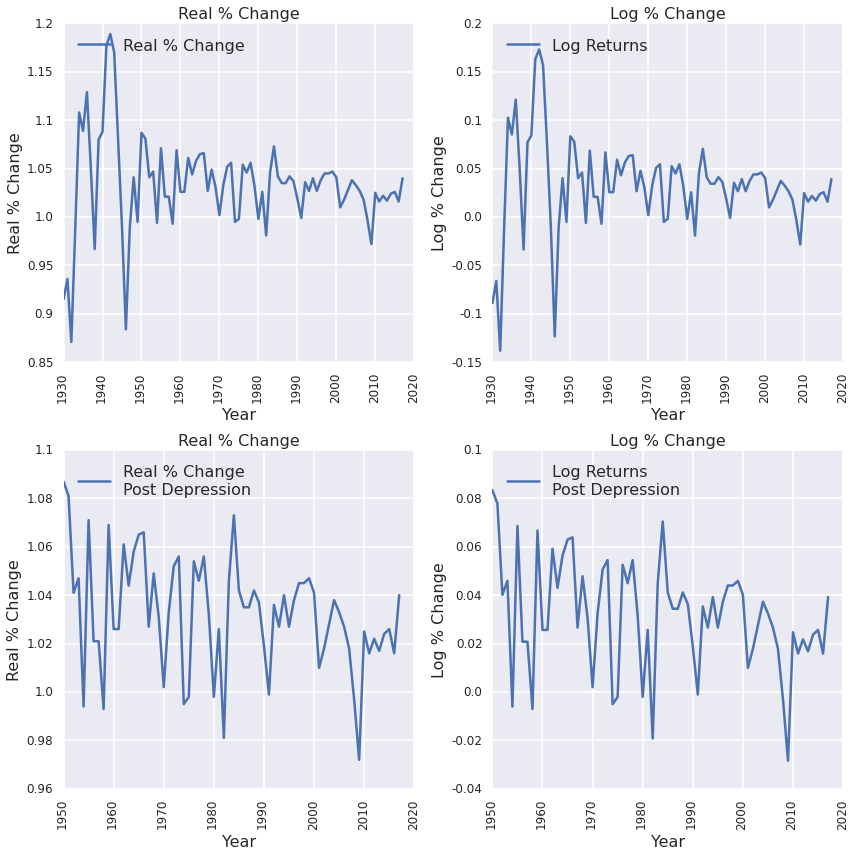

In [311]:
figure = plt.figure()
figure.set_size_inches((12,12))

start = 0
stop = len(gdp)

frame = gdp.iloc[start:stop]

# Chart 1
ax = figure.add_subplot(2, 2, 1)
ax.plot(frame["%"], label = 'Real % Change')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

# Chart 2
ax = figure.add_subplot(2, 2, 2)
ax.plot(frame["log"], label = 'Log Returns')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Log % Change",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

plt.tight_layout()


start = 20
stop = len(gdp)

frame = gdp.iloc[start:stop]

# Chart 3
ax = figure.add_subplot(2, 2, 3)
ax.plot(frame["%"], label = 'Real % Change\nPost Depression')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

# Chart 4
ax = figure.add_subplot(2, 2, 4)
ax.plot(frame["log"], label = 'Log Returns\nPost Depression')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Log % Change",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

plt.tight_layout()
plt.show()

### During the depression there was a lot of volatility, negative and positive growth.  Since then, volatility has been much more stable, but has been trending downward.  From 1950 through the mid-80s, the highs and the lows were getting lower.  GDP then broke above that once, followed again by lower highs.  Lows seemed like they had found a bottom, and created a  flag-like pattern, with the fed repeatedly managing the economy.

### Only during the real estate collapse did things take a real nose dive.  If the economy were to get to 5% from here, that would be unheard of as we are at or near the top of the range.

## fit trend lines

In [315]:
start = 1
end = -1

y = gdp["%"].iloc[start:end]
x = range(len(y))

coefficients = numpy.poly1d(numpy.polyfit(x = x, y = y, deg = 1))
line = numpy.poly1d(coefficients)
trend_line_coefficients["%"]["all"] = coefficients

trend  = list([numpy.nan] * start)
trend += list(line(x))
trend += list([numpy.nan] * 1)

gdp["% trend"] = trend

## Calculate the trend of all log returns

In [357]:
trend_line_coefficients = {'%': {'full': [], 'post': []}, 'log': {'full': [], 'post': []}}

def fit_trend(_source, _start, _stop):
    y = gdp[_source].iloc[_start: _stop]
    x = range(len(y))

    coefficients = numpy.poly1d(numpy.polyfit(x = x, y = y, deg = 1))
    line = numpy.poly1d(coefficients)
    
    if _start == 0:
        trend_line_coefficients[_source]['full'] = coefficients
    else:
        trend_line_coefficients[_source]['post'] = coefficients

    trend  = list([numpy.nan] * _start)
    trend += list(line(range(len(y) + 1)))
    return trend

gdp['% trend'] = fit_trend('%', 0, len(gdp) - 1)
gdp['log trend'] = fit_trend('log', 0, len(gdp) - 1)
gdp['% trend post'] = fit_trend('%', 20, len(gdp) - 1)
gdp['log trend post'] = fit_trend('log', 20, len(gdp) - 1)

## Plot the trend lines

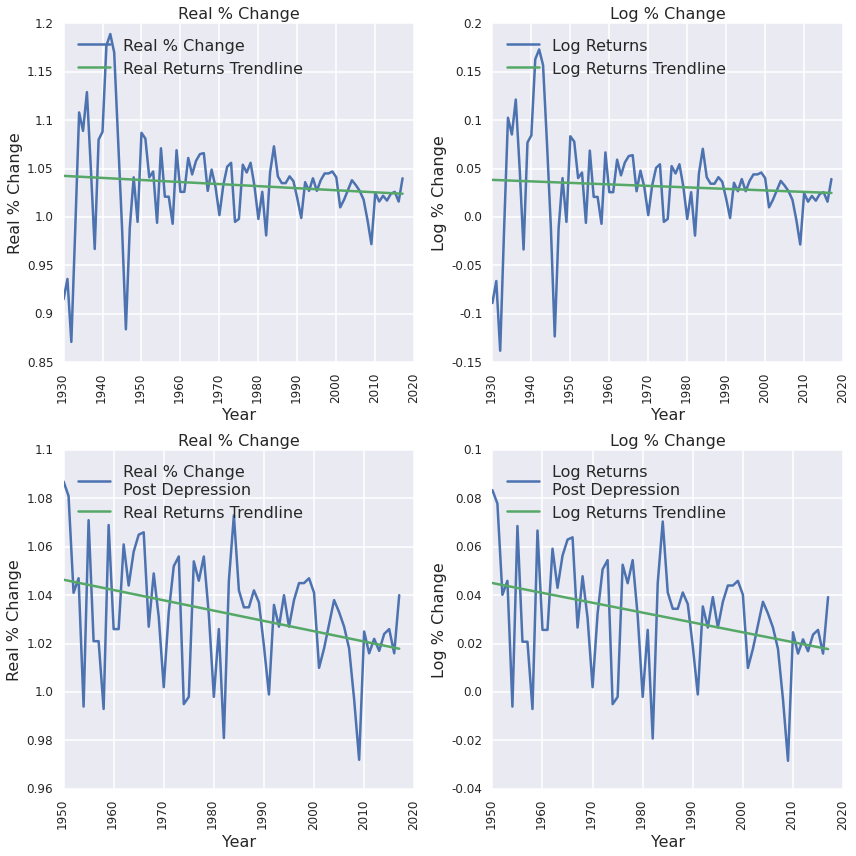

In [359]:
figure = plt.figure()
figure.set_size_inches((12, 12))

start = 0
stop = len(gdp)
frame = gdp.iloc[start:stop]

# Chart 1
ax = figure.add_subplot(2, 2, 1)
ax.plot(frame["%"], label = 'Real % Change')
ax.plot(frame["% trend"], label = 'Real Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

# Chart 2
ax = figure.add_subplot(2, 2, 2)
ax.plot(frame["log"], label = 'Log Returns')
ax.plot(frame["log trend"], label = 'Log Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Log % Change",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)


start = 20
stop = len(gdp)
frame = gdp.iloc[start:stop]

# Chart 3
ax = figure.add_subplot(2, 2, 3)
ax.plot(frame["%"], label = 'Real % Change\nPost Depression')
ax.plot(frame["% trend post"], label = 'Real Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

# Chart 4
ax = figure.add_subplot(2, 2, 4)
ax.plot(frame["log"], label = 'Log Returns\nPost Depression')
ax.plot(frame["log trend post"], label = 'Log Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Log % Change",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

plt.tight_layout()
plt.show()

### Whether including the depression or not, or using the percent return or log return, GDP growth is declining.  On all charts, the recent GDP growth rate is at the long-term trendline.  The only time when growth has hovered near the longterm trendline and then rallied was in the mid-1990s.  As far as I am aware that growth was due to effeciency caused by the creation of the internet and paying down of the debt.  If the government increases the debt (even more than it is) will that really cause a rally?

## Detrending GDP

## $$ \bar{y}_{t} = y_{t} - (α_{0} +  α_{1}t)$$
## $$ \bar{y}_{t} = \log(y_{t}) - (α_{0} +  α_{1}t)$$

In [360]:
gdp["% detrend"] = gdp["%"] - gdp["% trend"]
gdp["% detrend post"] = gdp["%"] - gdp["% trend post"]

gdp["log detrend"] = gdp["log"] - gdp["log trend"]
gdp["log detrend post"] = gdp["log"] - gdp["log trend post"]

In [361]:
gdp.tail()

,%,log,% trend,log trend,% trend post,log trend post,% detrend,% detrend post,log detrend,log detrend post
year,,,,,,,,,,
2013,1.017,0.016857,1.024883,0.025494,1.019591,0.019373,-0.007883,-0.002591,-0.008637,-0.002516
2014,1.024,0.023717,1.024671,0.025339,1.019165,0.018966,-0.000671,0.004835,-0.001622,0.004751
2015,1.026,0.025668,1.024458,0.025184,1.018740,0.018558,0.001542,0.007260,0.000484,0.007109
2016,1.016,0.015873,1.024246,0.025029,1.018314,0.018151,-0.008246,-0.002314,-0.009155,-0.002278
2017,1.040,0.039221,1.024034,0.024874,1.017889,0.017744,0.015966,0.022111,0.014347,0.021477


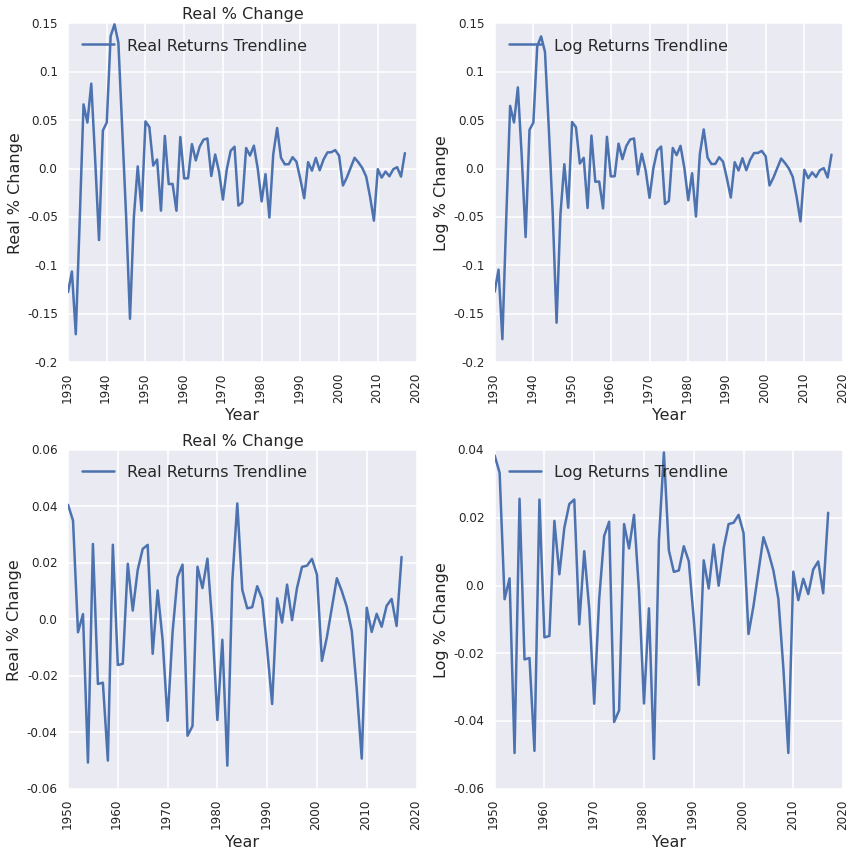

In [363]:
figure = plt.figure()
figure.set_size_inches((12,12))

start = 0
stop = len(gdp)

frame = gdp.iloc[start:stop]

# Chart 1
ax = figure.add_subplot(2, 2, 1)
ax.plot(frame["% detrend"], label = 'Real Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

# Chart 2
ax = figure.add_subplot(2, 2, 2)
ax.plot(frame["log detrend"], label = 'Log Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

start = 20
stop = -3

# Chart 3
ax = figure.add_subplot(2, 2, 3)
ax.plot(frame["% detrend post"], label = 'Real Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

# Chart 4
ax = figure.add_subplot(2, 2, 4)
ax.plot(frame["log detrend post"], label = 'Log Returns Trendline')

settings = {
    "ax": ax,
    "frame": frame,
    "title": "",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

plt.tight_layout()
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

### Calculate the normal distribution for each data set

In [365]:
normal = scipy.stats.norm
dists = {"%": {"full": 0, "post": 0}, "log": {"full": 0, "post": 0}}

dists["%"]["full"]  = normal.fit(gdp["% detrend"].values[0:-1])
dists["%"]["post"] = normal.fit(gdp["% detrend post"].values[20:-1])

dists["log"]["full"]   = normal.fit(gdp["log detrend"].values[0:-1])
dists["log"]["post"]  = normal.fit(gdp["log detrend post"].values[20:-1])

### Calculate the pdf and stand deviation lines

In [366]:
ppf = lambda _x, _y: normal(*_x).ppf(_y)
deviation_line = lambda _x, _y, _z: numpy.linspace(ppf(_x, _y), ppf(_x, _y), _z)
pdf_line = lambda _x: numpy.linspace(ppf(_x, 0.003), ppf(_x, 0.997), 150)

        
pdfs = {"%": {"full": 0, "post": 0}, "log": {"full": 0, "post": 0}}        
deviatons = {"%": {"full": [], "post": []}, "log": {"full": [], "post": []}}

lengths = [len(gdp["log detrend"].values[0:-1]), len(gdp["log detrend post"].values[20:-3])]

for i in ["%", "log"]:
    for a, j in enumerate(["full", "post"]):

        pdfs[i][j] = pdf_line(dists[i][j])
        for k in [0.003, 0.05, 0.32, 0.68, 0.95, 0.997]:
            deviatons[i][j].append(deviation_line(dists[i][j], k, lengths[a]))



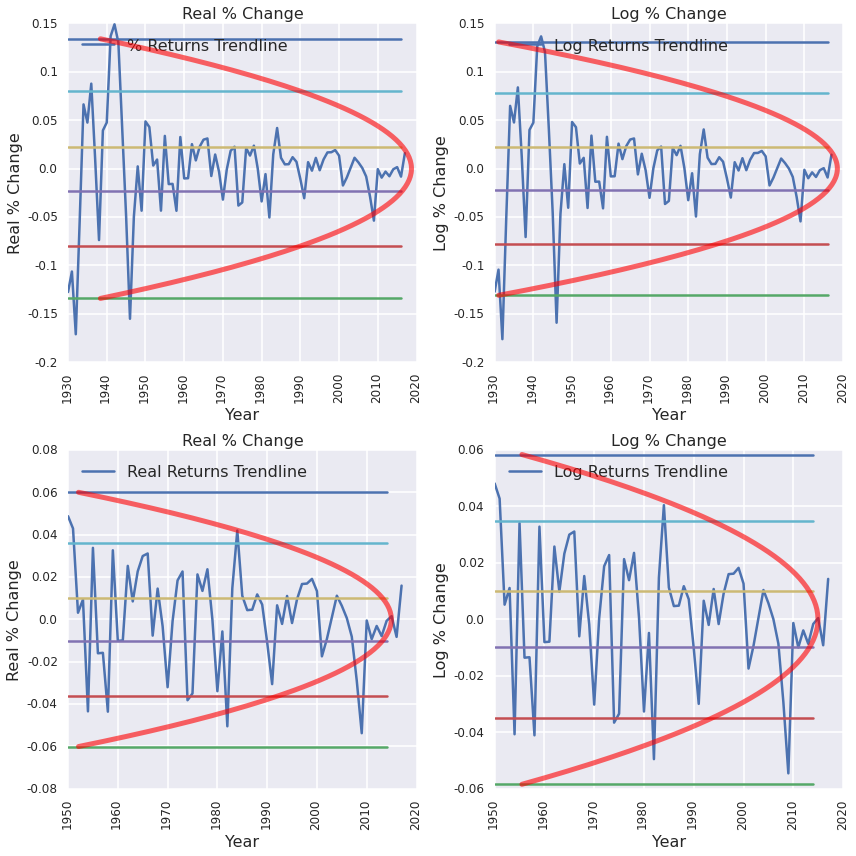

In [368]:
figure = plt.figure()

figure.set_size_inches((12, 12))

start = 0
stop = len(gdp)

frame = gdp.iloc[start:stop]

# Chart 1
ax = figure.add_subplot(2, 2, 1)
ax.plot(frame["% detrend"], label = '% Returns Trendline')

for i in range(6):
    ax.plot(deviatons["%"]["full"][i])

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

pdf = pdfs["%"]["full"]
ax = ax.twiny()
ax.plot(scipy.stats.norm.pdf(pdf), pdf, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.get_xaxis().set_ticks([])

# Chart 2
ax = figure.add_subplot(2, 2, 2)
ax.plot(frame["log detrend"], label = 'Log Returns Trendline')

for i in range(6):
    ax.plot(deviatons["log"]["full"][i])

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Log % Change",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

pdf = pdfs["log"]["full"]
ax = ax.twiny()
ax.plot(scipy.stats.norm.pdf(pdf), pdf, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.get_xaxis().set_ticks([])

start = 20
stop = len(gdp)

frame = gdp.iloc[start:stop]

# Chart 3
ax = figure.add_subplot(2, 2, 3)
ax.plot(frame["% detrend"], label = 'Real Returns Trendline')

for i in range(6):
    ax.plot(deviatons["%"]["post"][i])

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Real % Change",
    "xLabel": "Year", 
    "yLabel": "Real % Change",
    "yTick_format": float
    }

Chart.setup(settings)

pdf = pdfs["%"]["post"]
ax = ax.twiny()
ax.plot(scipy.stats.norm.pdf(pdf), pdf, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.get_xaxis().set_ticks([])


# Chart 4
ax = figure.add_subplot(2, 2, 4)
ax.plot(frame["log detrend"], label = 'Log Returns Trendline')

for i in range(6):
    ax.plot(deviatons["log"]["post"][i])

settings = {
    "ax": ax,
    "frame": frame,
    "title": "Log % Change",
    "xLabel": "Year", 
    "yLabel": "Log % Change",
    "yTick_format": float
    }

Chart.setup(settings)

pdf = pdfs["log"]["post"]
ax = ax.twiny()
ax.plot(scipy.stats.norm.pdf(pdf), pdf, 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.get_xaxis().set_ticks([])
# ax.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', labelbottom = 'off')

plt.tight_layout()
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

### When looking at the Full % Returns, there are some 

### With the log returns detrended, I calculated the normal distribution and plotted it to get an idea of how likely a log 4% growth rate would be and it has only happened twice in the last 70 years. But because these are log returns, a 4% real return is more like 2% log return.  It seems that that is within one standard deviation and is reasonable.  I would expect that that would result an immediate recession.

### The question is then how cyclical are recessions.  One thing to note is that, a series of slow positive growth even weak growth is rare, and seems to only have happened in the 90s.  Is there another technology that will inspire businesses to growth and people to spend more?  I doubt it.  A quick eyeball, glance looks likes recessions happen about every 10 years (a little less).